# Markov Chain Monte Carlo and model fitting

```python
# Linear regression with pyMC3
formula = "num_clicks ~ clothes_banners_shown + sneakers_banners_shown"
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=ads_aggregated)
    # Print model specification
    print(model)
    # Sample posterior draws
    trace = pm.sample(draws=1000, tune=500)

```

## Sampling posterior draws
> 
> Tired of working for the central government and for the marketing company, you take a new job as a data analyst for your city's local authorities. The city operates a bike-sharing system in the city and they ask you to predict the number of bikes rented per day to plan staff and repairs accordingly.
> 
> You have been given some data on the number of rented vehicles per day, temperature, humidity, wind speed, and whether the day was a working day:
> 
>          work_day      temp  humidity  wind_speed  num_bikes
>     0           0  0.344167  0.805833    0.160446      0.985
>     1           0  0.363478  0.696087    0.248539      0.801
>     ..        ...       ...       ...         ...        ...
>     698         1  0.280870  0.555652    0.115522      5.323
>     699         1  0.298333  0.649583    0.058471      5.668
>     
> 
> Try building a regression model to predict `num_bikes` using the `bikes` DataFrame and `pymc3` (aliased as `pm`).
> 
> _NOTE: Calling `pm.sample()` for the first time in a fresh Python session takes some time, as Python code is being compiled to C under the hood. To save you time, we only ask you to get the code right instead of executing it._

# Interpreting results and comparing models

```python
# Trace plot
pm.traceplot(trace_1)

# Forest plot
pm.forestplot(trace_1)

# Trace summary
pm.summary(trace_1)

# Fitting another model
formula = "num_clicks ~ clothes_banners_shown + sneakers_banners_shown + weekend"
with pm.Model() as model_2:
    pm.GLM.from_formula(formula, data=ads_aggregated)
    trace_2 = pm.sample(draws=1000, tune=500)
    
# Widely Applicable Information Criterion (WAIC)
comparison = pm.compare({"trace_1": trace_1, "trace_2": trace_2},
                        ic="waic", scale="deviance")
print(comparison)    

# Compare plot
pm.compareplot(comparison)

```



## Inspecting posterior draws
> 
> You continue working on your task to predict the number of bikes rented per day in a bike-sharing system. The posterior draws from your regression model which you sampled before are available in your workspace as `trace_1`.
> 
> You know that after obtaining the posteriors, it is best practice to take a look at them to see if they make sense and if the MCMC process has converged successfully. In this exercise, you will create two plots visualizing posterior draws and summarize them in a table. Let's inspect our posteriors!
> 
> _NOTE: Please allow up to half a minute for the plots to render, since they have many draws to process._

[Inspecting posterior draws | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=5)

> -   Import `pymc3` under its usual alias, `pm`.
> -   Draw a trace plot of `trace_1`.
> -   Draw a forest plot of `trace_1`.

In [ ]:
# Import pymc3
import pymc3 as pm

# Draw a trace plot of trace_1
pm.traceplot(trace_1)
plt.show()

# Draw a forest plot of trace_1
pm.forestplot(trace_1)
plt.show()

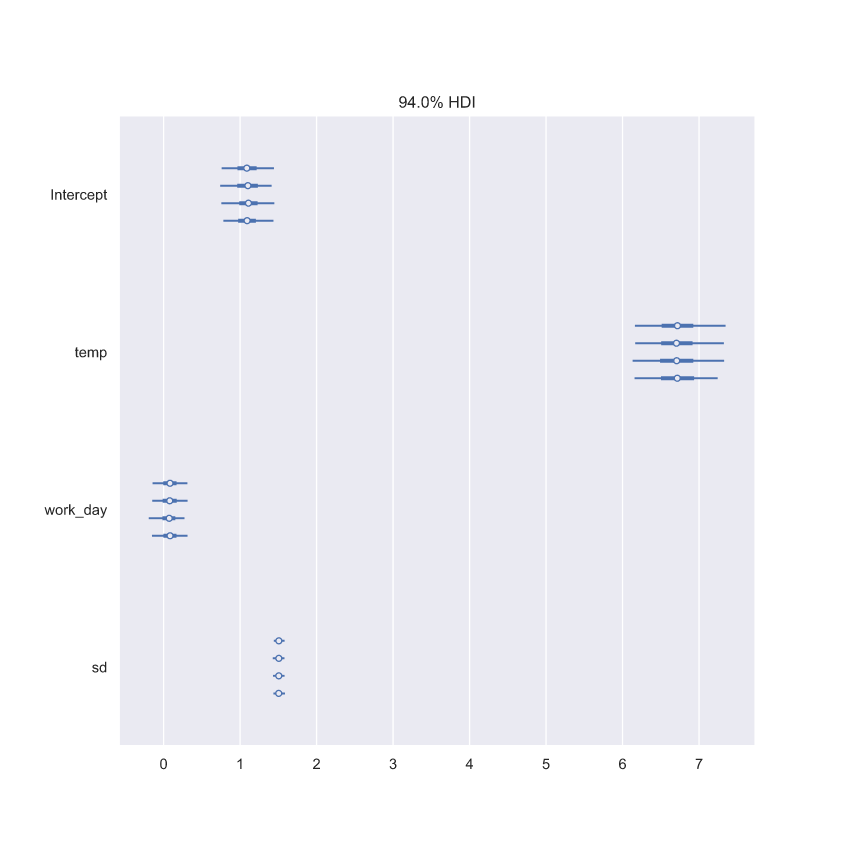

## Comparing models with WAIC
> 
> Now that you have successfully built the first, basic model, you take another look at the data at your disposal. You notice a variable called `wind_speed`. This could be a great predictor of the numbers of bikes rented! Cycling against the wind is not that much fun, is it?
> 
> You fit another model with this additional predictor:
> 
>     formula = "num_bikes ~ temp + work_day + wind_speed"
>     
>     with pm.Model() as model_2:
>         pm.GLM.from_formula(formula, data=bikes)
>         trace_2 = pm.sample(draws=1000, tune = 500)
>     
> 
> Is your new `model_2` better than `model_1`, the one without wind speed? Compare the two models using Widely Applicable Information Criterion, or WAIC, to find out!
> 
> Both `trace_1` and `trace_2` are available in your workspace, and `pycm3` has been imported as `pm`.

[Comparing models with WAIC | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=6)

> Create a dictionary `traces_dict` with two keys, `trace_1` and `trace_2`, holding the corresponding trace objects.

In [ ]:
# Gather trace_1 and trace_2 into a dictionary
traces_dict = {"trace_1": trace_1, "trace_2": trace_2}

[Comparing models with WAIC | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=6)

> Call the appropriate `pymc3` function to create a comparison table based on `traces_dict`, using `waic` for comparison, and assign the result to `comparison`.

In [ ]:
# Create a comparison table based on WAIC
comparison = pm.compare(traces_dict,
                        ic="waic", scale="deviance")

[Comparing models with WAIC | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=6)

> Draw a comparison plot between the two models (a `textsize` argument was added to the plotting function you need to call to improve the plot's readability).

In [ ]:
# Draw a comparison plot
pm.compareplot(comparison, textsize=20)
plt.show()

# Making predictions

```python
# Sampling predictive draws
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=ads_test)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_2)
    
# How good is the prediction?
pm.plot_posterior(posterior_predictive["y"][:, 0])

# Test error distribution
errors = []
for index, test_example in ads_test.iterrows():
    error = posterior_predictive["y"][:, index] - test_example["num_clicks"]
    errors.append(error)
error_distribution = np.array(errors).reshape(-1)
error_distribution.shape

```

## Sample from predictive density
> 
> Finally! Your job is to predict the number of bikes rented per day, and you are almost there. You have fitted the model and verified the quality of parameter draws. You have also chosen the better of the two competing models based on the WAIC. Now, it's time to use your best model to make predictions!
> 
> A couple of new observations, not seen by the model, have been collected in a DataFrame named `bikes_test`. For each of them, we know the true number of bikes rented, which will allow us to evaluate model performance. In this exercise, you will get familiar with the test data and generate predictive draws for every test observation. The trace of your model which you have generated before is available as `trace_2`, and `pymc3` has been imported as `pm`. Let's make predictions!

### init

In [1]:
import pymc3 as pm

In [2]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(bikes_test)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'bikes_test.csv': 'https://file.io/rsBnR5pd9Yyz'}}
"""
prefixToc='3.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

import pandas as pd
bikes_test = pd.read_csv(prefix+'bikes_test.csv',index_col=0)


Téléchargements à lancer
{'pandas.core.frame.DataFrame': {'bikes_test.csv': 'https://file.io/rsBnR5pd9Yyz'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   471    0   471    0     0    768      0 --:--:-- --:--:-- --:--:--   767



### code

[Sample from predictive density | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=8)

> Print the head of `bikes_test` to the console and get familiar with the data.

In [3]:
# Print bikes_test head
print(bikes_test.head())

   work_day      temp  humidity  wind_speed  num_bikes
0         0  0.265833  0.687917    0.175996      2.947
1         1  0.282609  0.622174    0.153800      3.784
2         1  0.354167  0.496250    0.147379      4.375
3         1  0.256667  0.722917    0.133721      2.802
4         1  0.265000  0.562083    0.194037      3.830


[Sample from predictive density | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=8)

> Define the model `formula` to predict `num_bikes` using `temp`, `work_day` and `wind_speed` as predictors.

In [5]:
# Define the formula
formula = "num_bikes ~ temp + work_day + wind_speed"

[Sample from predictive density | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=8)

> Generate predictive draws for the test data and assign the result to `posterior_predictive`.

In [ ]:
# Generate predictive draws
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=bikes_test)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_2)

## Estimating test error
> 
> Now that you have your `posterior_predictive` (available to you in your workspace), you can evaluate model performance on new data. To do this, you will need to loop over the test observations, and for each of them, compute the prediction error as the difference between the predictive distribution for this observation and the actual, true value. This will give you the distribution of your model's error, which you can then visualize.
> 
> You will need `pymc3` and `numpy`, which have been imported for you as `pm` and `np`, respectively. The test data, `bikes_test`, is also available in your workspace. Let's get to it!

[Estimating test error | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=9)

> -   Initialize `errors` as an empty list.
> -   For each row in `bikes_test`, calculate prediction error as the predictive draws for this row from `posterior_predictive` minus the single true value of `num_bikes` from the row.
> -   Reshape `errors` by converting them to a `numpy` array and applying the `.reshape()` method to the outcome, and assign the final result to `error_distribution`.
> -   Plot the test error distribution using `pymc3`'s `plot_posterior()` function.

### init

In [8]:
###################
##### numpy ndarray float
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(posterior_predictive['y'])
"""

tobedownloaded="""
{numpy.ndarray: {'_4.csv': 'https://file.io/8juJjFtQMYs1'}}
"""
prefixToc='3.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc)

#initialisation

from downloadfromFileIO import loadNDArrayFromCsv
cont = loadNDArrayFromCsv(prefix+'_4.csv')

Téléchargements à lancer
{'numpy.ndarray': {'_4.csv': 'https://file.io/8juJjFtQMYs1'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  715k    0  715k    0     0   606k      0 --:--:--  0:00:01 --:--:--  606k



In [9]:
posterior_predictive={}
posterior_predictive['y']=cont

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### code

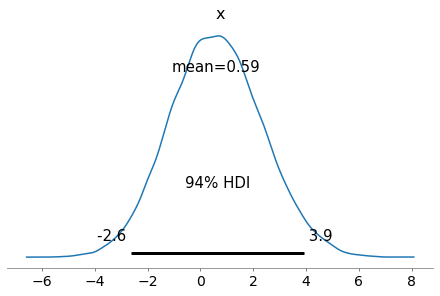

In [17]:
# Initialize errors
errors = []

# Iterate over rows of bikes_test to compute error per row
for index, test_example in bikes_test.iterrows():
    error = posterior_predictive["y"][:, index] - test_example["num_bikes"]
    errors.append(error)

# Reshape errors
error_distribution = np.array(errors).reshape(-1)

# Plot the error distribution
pm.plot_posterior(error_distribution)
plt.show()

# How much is an avocado?

```python

# Priors in pymc3
formula = "num_bikes ~ temp + work_day + wind_speed"
with pm.Model() as model:
    priors = {"wind_speed": pm.Normal.dist(mu=-5)}
    pm.GLM.from_formula(formula, data=bikes, priors=priors)
    trace = pm.sample(draws=1000, tune=500)

# Extracting draws from trace
temp_draws = trace.get_values("temp")
print(temp_draws)

```

## Fitting the model
> 
> You can use a linear regression model to estimate the avocado price elasticity. The regression formula should be:
> 
> ![](https://assets.datacamp.com/production/repositories/5803/datasets/a6d91cf8bf0de76c8510513c9c1e7815a186ce6e/avocado_formula.png)
> 
> Here,
> 
> will be the price elasticity, that is the impact of price on sales. You will assume that the elasticity is the same for regular and organic avocados. You also expect it to be negative: the higher the price, the lower the sales, that's the case for most goods. To incorporate this prior knowledge into the model, you decide to use a normal distribution with mean `-80` as the prior for price. How would you build such a model?
> 
> _NOTE: Recall that calling `pm.sample()` for the first time in a fresh Python session takes some time, as Python code is being compiled to C under the hood. To save you time, we only ask you to get the code right instead of executing it._

## Inspecting the model
> 
> Well done getting the model-building right! The `trace` is available in your workspace and, following the best practices, you will now inspect the posterior draws to see if there are any convergence issues. Next, you will extract each model parameter from the trace and summarize it with its posterior mean. These posterior means will come in handy later, when you will be making predictions with the model. Let's take a look at the parameter draws!
> 
> You will need to use `pymc3` and `numpy`, which have been imported for you as `pm` and `np`, respectively.
> 
> _NOTE: Please allow up to half a minute for the plots to render, since they have many draws to process._

[Inspecting the model | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=12)

> -   Draw and examine the trace plot of posterior draws.
> -   Create a summary of posterior draws, assign in to `summary`, and print it.

In [ ]:
# Draw a trace plot of trace
pm.traceplot(trace)
plt.show()

# Print a summary of trace
summary = pm.summary(trace)
print(summary)

[Inspecting the model | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=12)

> -   Calculate posterior mean of each parameter by extracting draws from `trace` and wrapping them with a function computing the mean.
> -   Assign the posterior means to `intercept_mean`, `organic_mean`, `price_mean`, and `sd_mean`, accordingly.

In [ ]:
# Get each parameter's posterior mean
intercept_mean = np.mean(trace.get_values("Intercept")) 
organic_mean = np.mean(trace.get_values("type_organic")) 
price_mean = np.mean(trace.get_values("price")) 
sd_mean = np.mean(trace.get_values("sd")) 

## Optimizing the price
> 
> Great job on fitting and inspecting the model! Now, down to business: your boss asks you to provide the avocado price that would yield the largest profit, and to state what profit can be expected. Also, they want the price to be divisible by $0.25 so that the customers can easily pay with quarters.
> 
> In this exercise, you will use your model to predict the volume and the profit for a couple of sensible prices. Next, you will visualize the predictive distributions to pick the optimal price. Finally, you will compute the credible interval for your profit prediction. Now go and optimize!
> 
> The posterior means you have computed before are available to you as `intercept_mean`, `organic_mean`, `price_mean`, and `sd_mean`, respectively. Also, `pymc3` and `numpy` are imported as `pm` and `np`.

[Optimizing the price | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=13)

> -   For each price in `0.5`, `0.75`, `1` and `1.25`, calculate the predictive mean.
> -   Sample from the predictive distribution to predict sales volume.
> -   Use the predicted volume to predict the profit.

In [18]:
intercept_mean=424.59727412425855
organic_mean = -291.27216985480396
price_mean = -79.969206808968
sd_mean = 40.937236029201884

In [19]:
# For each price, predict volume and use it to predict profit
predicted_profit_per_price = {}
for price in [0.5, 0.75, 1, 1.25]:
    pred_mean = (intercept_mean+price_mean*price+organic_mean)
    volume_pred = np.random.normal(pred_mean, sd_mean, size=1000)
    profit_pred = volume_pred * price
    predicted_profit_per_price.update({price: profit_pred})

[Optimizing the price | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=13)

> Draw a forest plot of predicted profit.

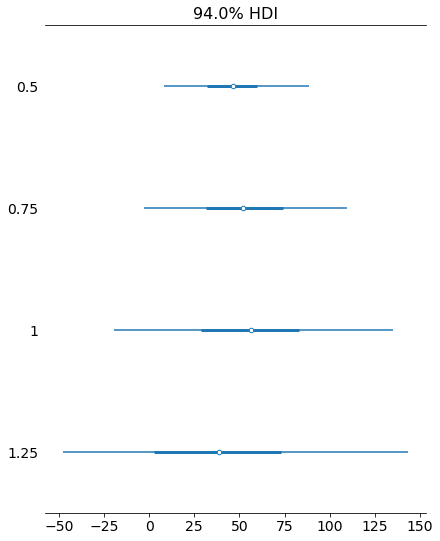

In [20]:
# Draw a forest plot of predicted profit for all prices
pm.forestplot(predicted_profit_per_price)
plt.show()

[Optimizing the price | Python](https://campus.datacamp.com/courses/bayesian-data-analysis-in-python/bayesian-linear-regression-with-pymc3?ex=13)

> Based on the plot you have just created, pick the optimal price and calculate the Highest Posterior Density credible interval of 99% for this price.

In [24]:
# Calculate and print HPD of predicted profit for the optimal price
opt_hpd = pm.hpd(predicted_profit_per_price[0.75],credible_interval=0.99)
print(opt_hpd)

[ -2.78908134 109.62678093]
